In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'True positive rate')

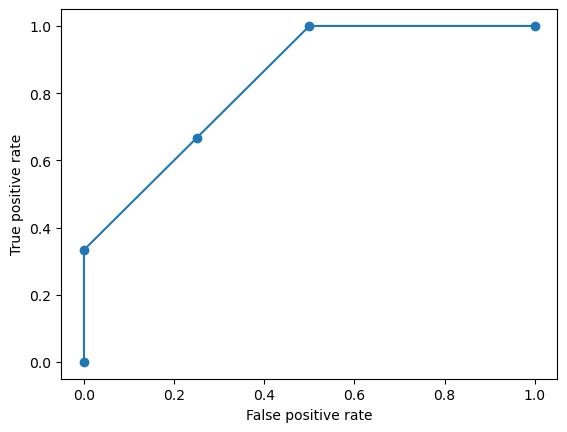

In [33]:
# Q1.5

confidence_positive = [0.95, 0.85, 0.8, 0.7, 0.55, 0.45, 0.4, 0.3, 0.2, 0.1]
correct_class = np.array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0])
num_neg = np.sum(correct_class == 0)
num_pos = np.sum(correct_class == 1)

FPR = []
TPR = []

TP = 0
FP = 0
last_TP = 0
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)
for i in range(len(correct_class)):
    if (i > 1) and ( confidence_positive[i] != confidence_positive[i-1] ) and ( correct_class[i] == 0 ) and ( TP > last_TP ):
        FPR.append(FP/num_neg)
        TPR.append(TP/num_pos)
        last_TP = TP
    if (correct_class[i] == 1):
        TP += 1
    else:
        FP += 1
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)
plt.plot(FPR, TPR, 'o-')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
    
                                                                           

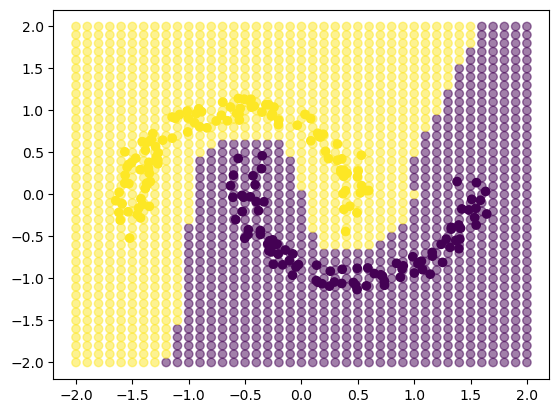

In [95]:
#Q2.1

D2z = np.loadtxt('./hw3Data/D2z.txt')
plt.figure()
plt.scatter(D2z[:,0], D2z[:,1], c = D2z[:,2])

k = 1

p = np.linspace(-2,2,41)
xx, yy = np.meshgrid(p, p)
points = np.c_[xx.ravel(), yy.ravel()]
out = np.empty(len(points))

for i in range(len(points)):
    v = points[i] - D2z[:,:-1]
    dist = np.linalg.norm(v, axis = 1)
    nn_ind = np.argmin(dist)
    out[i] = D2z[nn_ind,-1]

plt.scatter(points[:,0],points[:,1], c = out, alpha=0.5)

In [168]:
# Q2.2
import pandas as pd
emails_csv = pd.read_csv('./hw3Data/emails.csv')

features = emails_csv.values[:,1:-1].astype(float)
predictions = emails_csv.values[:,-1].astype(int)


features_1 = features[0:1000]
features_2 = features[1000:2000]
features_3 = features[2000:3000]
features_4 = features[3000:4000]
features_5 = features[4000:5000]
predictions_1 = predictions[0:1000]
predictions_2 = predictions[1000:2000]
predictions_3 = predictions[2000:3000]
predictions_4 = predictions[3000:4000]
predictions_5 = predictions[4000:5000]

n_pos = np.sum(predictions_2 == 1)
n_pos += np.sum(predictions_3 == 1)
n_pos += np.sum(predictions_4 == 1)
n_pos += np.sum(predictions_5 == 1)
print(n_pos)

n_neg = np.sum(predictions_2 == 0)
n_neg += np.sum(predictions_3 == 0)
n_neg += np.sum(predictions_4 == 0)
n_neg += np.sum(predictions_5 == 0)
print(n_neg)

def email_nn(train_features, train_predictions, test_features, test_predictions):
    predictions = np.empty(len(test_features))
    for i in range(len(test_features)):
        p = test_features[i]
        v = p - train_features
        dist = np.linalg.norm(v, axis = 1)
        nn_ind = np.argmin(dist)
        predictions[i] = train_predictions[nn_ind]

    TP_cases = predictions == 1
    TP_cases &= (test_predictions == 1)
    TP = np.sum(TP_cases)

    TN_cases = predictions == 0
    TN_cases &= (test_predictions == 0)
    TN = np.sum(TN_cases)
    
    FP_cases = predictions == 1
    FP_cases &= test_predictions == 0
    FP = np.sum(FP_cases)
    
    FN_cases = predictions == 0
    FN_cases &= test_predictions == 1
    FN = np.sum(FN_cases)
    return predictions, TP, TN, FP, FN
    

# Fold 1
test_features = features_1
test_predictions = predictions_1
train_features = np.concatenate((features_2, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_2, predictions_3,predictions_4,predictions_5))
predictions_out, TP, TN, FP, FN = email_nn(train_features, train_predictions, test_features, test_predictions)

accuracy = (TP+TN)/len(test_features)
print(f'Fold 1 accuracy = {accuracy:.3}')

precision = (TP)/(TP + FP)
print(f'Fold 1 precision = {precision:.3}')

recall = (TP)/(TP + FN)
print(f'Fold 1 recall = {recall:.3}')

# Fold 2
test_features = features_2
test_predictions = predictions_2
train_features = np.concatenate((features_1, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_3,predictions_4,predictions_5))
predictions_out, TP, TN, FP, FN = email_nn(train_features, train_predictions, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 2 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 2 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 2 recall = {recall:.3}')

# Fold 3
test_features = features_3
test_predictions = predictions_3
train_features = np.concatenate((features_1, features_2,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_4,predictions_5))
predictions_out, TP, TN, FP, FN = email_nn(train_features, train_predictions, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 3 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 3 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 3 recall = {recall:.3}')

# Fold 4
test_features = features_4
test_predictions = predictions_4
train_features = np.concatenate((features_1, features_2,features_3,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_5))
predictions_out, TP, TN, FP, FN = email_nn(train_features, train_predictions, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 4 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 4 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 4 recall = {recall:.3}')

# Fold 5
test_features = features_5
test_predictions = predictions_5
train_features = np.concatenate((features_1, features_2,features_3,features_4))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_4))
predictions_out, TP, TN, FP, FN = email_nn(train_features, train_predictions, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 5 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 5 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 5 recall = {recall:.3}')

1161
2839
Fold 1 accuracy = 0.825
Fold 1 precision = 0.654
Fold 1 recall = 0.818
Fold 2 accuracy = 0.853
Fold 2 precision = 0.686
Fold 2 recall = 0.866
Fold 3 accuracy = 0.862
Fold 3 precision = 0.721
Fold 3 recall = 0.838
Fold 4 accuracy = 0.851
Fold 4 precision = 0.716
Fold 4 recall = 0.816
Fold 5 accuracy = 0.775
Fold 5 precision = 0.606
Fold 5 recall = 0.758


In [204]:
# Q2.3

def sigmoid(z):
    # out = np.ones(len(z))
    # denominator = 1 + np.exp(-z)
    # out = out / denominator
    out = np.zeros(len(z))
    for i in range(len(z)):
        if (z[i] < 0):
            out[i] = np.exp(z[i])/(1+np.exp(z[i]))
        else:
            out[i] = 1/(1+np.exp(-z[i]))
    return out
    
def logistic_regression(train_features, train_predictions, learning_rate = 0.1, n_iterations=1000):
    ones = np.ones((len(train_features), 1))
    train_features = np.concatenate((ones, train_features), axis = 1)
    theta = np.zeros(len(train_features[0]))
    for i in range(n_iterations):
        f = sigmoid(np.dot(train_features, theta))
        gradient = np.dot(train_features.T, (f - train_predictions))
        theta -= learning_rate/len(train_predictions)*gradient
    
    return theta

def logreg_predict(theta, features, test_prediction=None):
    ones = np.ones((len(features), 1))
    features = np.concatenate((ones, features), axis = 1)
    predictions = np.zeros(len(features))
    p = sigmoid(np.dot(features, theta))
    predictions = (p > 0.5).astype(int)
    
    if test_prediction is not None:
        TP_cases = predictions == 1
        TP_cases &= (test_predictions == 1)
        TP = np.sum(TP_cases)

        TN_cases = predictions == 0
        TN_cases &= (test_predictions == 0)
        TN = np.sum(TN_cases)

        FP_cases = predictions == 1
        FP_cases &= test_predictions == 0
        FP = np.sum(FP_cases)

        FN_cases = predictions == 0
        FN_cases &= test_predictions == 1
        FN = np.sum(FN_cases)
    return out, TP, TN, FP, FN

# Fold 1
test_features = features_1
test_predictions = predictions_1
train_features = np.concatenate((features_2, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_2, predictions_3,predictions_4,predictions_5))
theta = logistic_regression(train_features, train_predictions)
predictions_out, TP, TN, FP, FN = logreg_predict(theta, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 1 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 1 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 1 recall = {recall:.3}')


# Fold 2
test_features = features_2
test_predictions = predictions_2
train_features = np.concatenate((features_1, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_3,predictions_4,predictions_5))
theta = logistic_regression(train_features, train_predictions)
predictions_out, TP, TN, FP, FN = logreg_predict(theta, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 2 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 2 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 2 recall = {recall:.3}')


# Fold 3
test_features = features_3
test_predictions = predictions_3
train_features = np.concatenate((features_1, features_2,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_4,predictions_5))
theta = logistic_regression(train_features, train_predictions)
predictions_out, TP, TN, FP, FN = logreg_predict(theta, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 3 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 3 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 3 recall = {recall:.3}')

# Fold 4
test_features = features_4
test_predictions = predictions_4
train_features = np.concatenate((features_1, features_2,features_3,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_5))
theta = logistic_regression(train_features, train_predictions)
predictions_out, TP, TN, FP, FN = logreg_predict(theta, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 4 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 4 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 4 recall = {recall:.3}')

# Fold 5
test_features = features_5
test_predictions = predictions_5
train_features = np.concatenate((features_1, features_2,features_3,features_4))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_4))
theta = logistic_regression(train_features, train_predictions)
predictions_out, TP, TN, FP, FN = logreg_predict(theta, test_features, test_predictions)
accuracy = (TP+TN)/len(test_features)
print(f'Fold 5 accuracy = {accuracy:.3}')
precision = (TP)/(TP + FP)
print(f'Fold 5 precision = {precision:.3}')
recall = (TP)/(TP + FN)
print(f'Fold 5 recall = {recall:.3}')

Fold 1 accuracy = 0.909
Fold 1 precision = 0.839
Fold 1 recall = 0.842
Fold 2 accuracy = 0.883
Fold 2 precision = 0.881
Fold 2 recall = 0.668
Fold 3 accuracy = 0.858
Fold 3 precision = 0.903
Fold 3 recall = 0.56
Fold 4 accuracy = 0.884
Fold 4 precision = 0.77
Fold 4 recall = 0.864
Fold 5 accuracy = 0.529
Fold 5 precision = 0.391
Fold 5 recall = 0.967


Text(0, 0.5, 'accuracy')

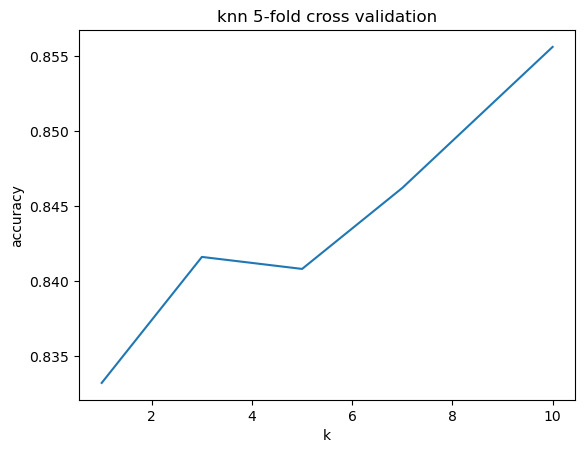

In [171]:
# Q2.4
def email_knn(k, train_features, train_predictions, test_features, test_predictions):
    predictions = np.empty(len(test_features))
    for i in range(len(test_features)):
        p = test_features[i]
        v = p - train_features
        dist = np.linalg.norm(v, axis = 1)
        knn_ind = np.argpartition(dist, k)
        yay = 0
        nay = 0
        for j in range(k):
            ind = knn_ind[j]
            prediction = train_predictions[ind]
            if (prediction == 1):
                yay += 1
            else:
                nay += 1
        if (yay > nay):
            predictions[i] = 1
        else:
            predictions[i] = 0

    TP_cases = predictions == 1
    TP_cases &= (test_predictions == 1)
    TP = np.sum(TP_cases)

    TN_cases = predictions == 0
    TN_cases &= (test_predictions == 0)
    TN = np.sum(TN_cases)
    
    FP_cases = predictions == 1
    FP_cases &= test_predictions == 0
    FP = np.sum(FP_cases)
    
    FN_cases = predictions == 0
    FN_cases &= test_predictions == 1
    FN = np.sum(FN_cases)
    return predictions, TP, TN, FP, FN

accuracy_knn_fold = np.zeros((5,5))
# Fold 1
test_features = features_1
test_predictions = predictions_1
train_features = np.concatenate((features_2, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_2, predictions_3,predictions_4,predictions_5))
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(1, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[0,0] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(3, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[1,0] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(5, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[2,0] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(7, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[3,0] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(10, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[4,0] = (TP+TN)/len(test_features)


# Fold 2
test_features = features_2
test_predictions = predictions_2
train_features = np.concatenate((features_1, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_3,predictions_4,predictions_5))
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(1, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[0,1] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(3, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[1,1] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(5, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[2,1] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(7, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[3,1] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(10, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[4,1] = (TP+TN)/len(test_features)

# Fold 3
test_features = features_3
test_predictions = predictions_3
train_features = np.concatenate((features_1, features_2,features_4,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_4,predictions_5))
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(1, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[0,2] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(3, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[1,2] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(5, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[2,2] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(7, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[3,2] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(10, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[4,2] = (TP+TN)/len(test_features)

# Fold 4
test_features = features_4
test_predictions = predictions_4
train_features = np.concatenate((features_1, features_2,features_3,features_5))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_5))
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(1, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[0,3] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(3, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[1,3] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(5, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[2,3] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(7, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[3,3] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(10, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[4,3] = (TP+TN)/len(test_features)

# Fold 5
test_features = features_5
test_predictions = predictions_5
train_features = np.concatenate((features_1, features_2,features_3,features_4))
train_predictions = np.concatenate((predictions_1, predictions_2,predictions_3,predictions_4))
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(1, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[0,4] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(3, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[1,4] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(5, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[2,4] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(7, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[3,4] = (TP+TN)/len(test_features)
predictions_1nn, TP, TN, FP_1nn, FN_1nn = email_knn(10, train_features, train_predictions, test_features, test_predictions)
accuracy_knn_fold[4,4] = (TP+TN)/len(test_features)

k = [1, 3, 5, 7, 10]
average_accuracy = np.average(accuracy_knn_fold, axis = 1)
plt.figure()
plt.plot(k, average_accuracy, 'o-')
plt.title('knn 5-fold cross validation')
plt.xlabel('k')
plt.ylabel('accuracy')
for i in range(len(average_accuracy)):
    label = "{:.4f}".format(average_accuracy[i])
    
    plt.annotate(label, # this is the text
                 (k[i],average_accuracy[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
print(average_accuracy)

[0.8332 0.8416 0.8408 0.8462 0.8556]


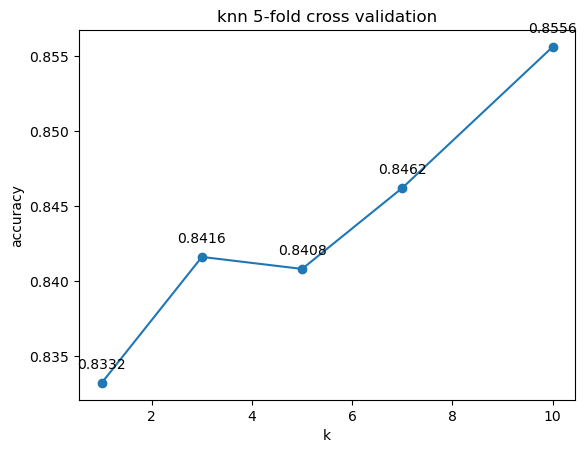

In [183]:
k = [1, 3, 5, 7, 10]
average_accuracy = np.average(accuracy_knn_fold, axis = 1)
plt.figure()
plt.plot(k, average_accuracy, 'o-')
plt.title('knn 5-fold cross validation')
plt.xlabel('k')
plt.ylabel('accuracy')
for i in range(len(average_accuracy)):
    label = "{:.4f}".format(average_accuracy[i])
    
    plt.annotate(label, # this is the text
                 (k[i],average_accuracy[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
print(average_accuracy)

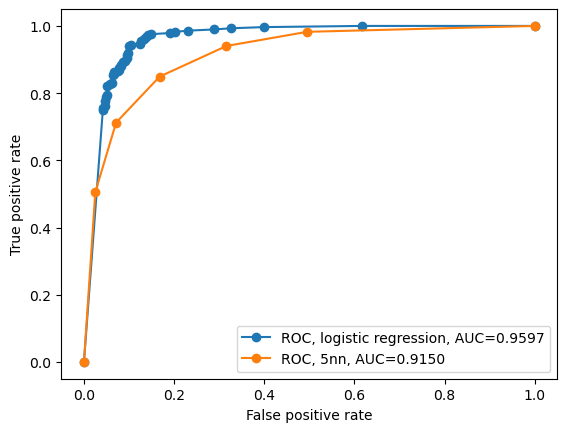

In [233]:
# Q2.5

def logreg_predict_with_probability(theta, features, test_prediction=None):
    ones = np.ones((len(features), 1))
    features = np.concatenate((ones, features), axis = 1)
    predictions = np.zeros(len(features))
    p = sigmoid(np.dot(features, theta))
    predictions = (p > 0.5).astype(int)
    probabilities = p
    if test_prediction is not None:
        TP_cases = predictions == 1
        TP_cases &= (test_predictions == 1)
        TP = np.sum(TP_cases)

        TN_cases = predictions == 0
        TN_cases &= (test_predictions == 0)
        TN = np.sum(TN_cases)

        FP_cases = predictions == 1
        FP_cases &= test_predictions == 0
        FP = np.sum(FP_cases)

        FN_cases = predictions == 0
        FN_cases &= test_predictions == 1
        FN = np.sum(FN_cases)
    return out, TP, TN, FP, FN, probabilities

def email_knn_with_probability(k, train_features, train_predictions, test_features, test_predictions):
    predictions = np.empty(len(test_features))
    probabilities = np.zeros(len(test_features))
    for i in range(len(test_features)):
        p = test_features[i]
        v = p - train_features
        dist = np.linalg.norm(v, axis = 1)
        knn_ind = np.argpartition(dist, k)
        yay = 0
        nay = 0
        for j in range(k):
            ind = knn_ind[j]
            prediction = train_predictions[ind]
            if (prediction == 1):
                yay += 1
            else:
                nay += 1
        if (yay > nay):
            predictions[i] = 1
        else:
            predictions[i] = 0
        probabilities[i] = yay/k
        
    TP_cases = predictions == 1
    TP_cases &= (test_predictions == 1)
    TP = np.sum(TP_cases)

    TN_cases = predictions == 0
    TN_cases &= (test_predictions == 0)
    TN = np.sum(TN_cases)
    
    FP_cases = predictions == 1
    FP_cases &= test_predictions == 0
    FP = np.sum(FP_cases)
    
    FN_cases = predictions == 0
    FN_cases &= test_predictions == 1
    FN = np.sum(FN_cases)
    return predictions, TP, TN, FP, FN, probabilities


# Fold 1
test_features = features_1
test_predictions = predictions_1
train_features = np.concatenate((features_2, features_3,features_4,features_5))
train_predictions = np.concatenate((predictions_2, predictions_3,predictions_4,predictions_5))
theta = logistic_regression(train_features, train_predictions)
predictions_log_reg, TP, TN, FP, FN, probabilities_logreg = logreg_predict_with_probability(theta, test_features, test_predictions)
predictions_5nn, TP, TN, FP_1nn, FN_1nn, probabilities_5nn = email_knn_with_probability(5, train_features, train_predictions, test_features, test_predictions)


#logistic regression ROC
sorted_ind = np.argsort(probabilities_logreg)
correct_class = test_predictions[sorted_ind[::-1]]
probabilities_logreg_sorted = probabilities_logreg[sorted_ind[::-1]]
num_neg = np.sum(correct_class == 0)
num_pos = np.sum(correct_class == 1)

FPR = []
TPR = []

TP = 0
FP = 0
last_TP = 0
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)
for i in range(len(correct_class)):
    if (i > 1) and ( probabilities_logreg_sorted[i] != probabilities_logreg_sorted[i-1] ) and ( correct_class[i] == 0 ) and ( TP > last_TP ):
        FPR.append(FP/num_neg)
        TPR.append(TP/num_pos)
        last_TP = TP
    if (correct_class[i] == 1):
        TP += 1
    else:
        FP += 1
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)

roc_area = np.trapz(TPR, FPR)
plt.figure()
plt.plot(FPR, TPR, 'o-', label = f'ROC, logistic regression, AUC={roc_area:.4f}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


#5nn ROC
sorted_ind = np.argsort(probabilities_5nn)
correct_class = test_predictions[sorted_ind[::-1]]
probabilities_5nn_sorted = probabilities_5nn[sorted_ind[::-1]]
num_neg = np.sum(correct_class == 0)
num_pos = np.sum(correct_class == 1)

FPR = []
TPR = []

TP = 0
FP = 0
last_TP = 0
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)
for i in range(len(correct_class)):
    if (i > 1) and ( probabilities_5nn_sorted[i] != probabilities_5nn_sorted[i-1] ) and ( correct_class[i] == 0 ) and ( TP > last_TP ):
        FPR.append(FP/num_neg)
        TPR.append(TP/num_pos)
        last_TP = TP
    if (correct_class[i] == 1):
        TP += 1
    else:
        FP += 1
FPR.append(FP/num_neg)
TPR.append(TP/num_pos)
roc_area = np.trapz(TPR, FPR)
plt.plot(FPR, TPR, 'o-', label = f'ROC, 5nn, AUC={roc_area:.4f}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.legend()